In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

precip = session.query(Measurement.date, func.avg(Measurement.prcp)).\
    filter(Measurement.date.between('2016-08-23', '2017-08-23')).\
    group_by(Measurement.date).all()

precip_df = pd.DataFrame(precip, columns=['date', 'precipitation'])

precip_df

precip_df.set_index('date', inplace=True)

precip_df

,precipitation
date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


In [11]:
#Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

start_date_df = precip_df.iloc[365]
end_date_df = precip_df.iloc[351]

start_date = '8-23-2016'



end_date = '8-23-2017'

print(f"Vacation begins at {start_date} and ends at {end_date}")

Vacation begins at 8-23-2016 and ends at 8-23-2017


# Exploratory Climate Analysis

In [12]:
# Calculate the date 1 year ago from the last data point in the database
last_date = precip_df.index[0]

last_date

'2016-08-23'

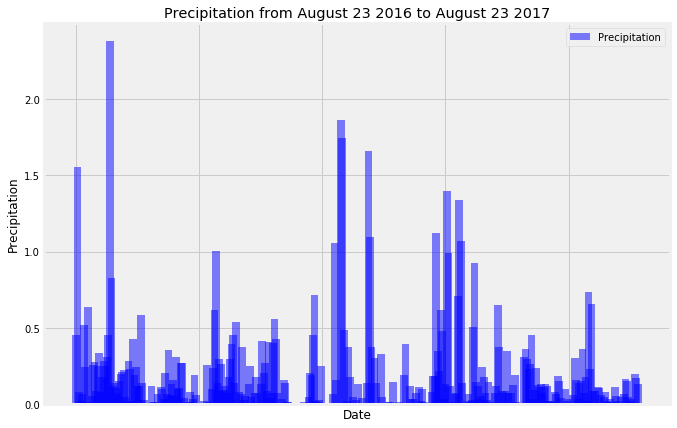

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
x_xis = precip_df.index.tolist()
y_axis = precip_df['precipitation'].tolist()

plt.figure(figsize=(10,7))
plt.bar(x_xis,y_axis,width = 5 ,color='b', alpha=0.5, align="center",label='Precipitation')
plt.tick_params(
    axis='x',         
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)
major_ticks = np.arange(0,400,80)
plt.xticks(major_ticks)

plt.title(f"Precipitation from August 23 2016 to August 23 2017")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.grid(which='major', axis='both', linestyle='-')
plt.legend()
plt.show()

In [14]:
station_count = session.query(Station.id).count()

print(f"There are {station_count} total stations.")


There are 9 total stations.


In [15]:
Stations = [Measurement.station,func.count(Measurement.id)]
Stations = session.query(*Stations).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).all()
Stations

high_stat = Stations[0]


print("Station USC00519281 has the highest number of obaervations with 2772 total observations")

Station USC00519281 has the highest number of obaervations with 2772 total observations


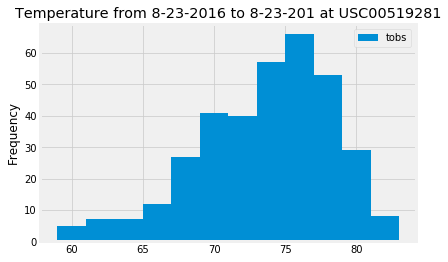

In [16]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

queryresult = session.query(Measurement.tobs).\
    filter(Measurement.station == Stations[0][0]).\
    filter(Measurement.date >= '2016-08-23').all()
temperatures = list(np.ravel(queryresult))

sel = [Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation]
queryresult = session.query(*sel).all()
stations_desc = pd.DataFrame(queryresult, columns=['Station','Name','Latitude','Longitude','Elevation'])

stationname = stations_desc.loc[stations_desc["Station"] == Stations[0][0],"Name"].tolist()[0]

# n, bins, patches = plt.hist(temperatures, bins=12,alpha=0.7, rwidth=1.0,label='tobs')
plt.hist(temperatures, bins=12,rwidth=1.0,label='tobs')
plt.grid(axis='both', alpha=0.75)
plt.ylabel('Frequency')
plt.title(f"Temperature from 8-23-2016 to 8-23-201 at USC00519281")
plt.legend()
# maxfreq = n.max()
# plt.ylim(top=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

## Optional Challenge Assignment